# Medical Insurance Cost Prediction
#### Using Regression to perform prediction of Insurance charges based on Medical report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import os
import sys
import csv

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

sb.set_style('darkgrid')


In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\Medical Insurance Cost Prediction\medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


### Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


Text(0.5, 1.0, 'Age Response from the Dataset with a mean of 39.0')

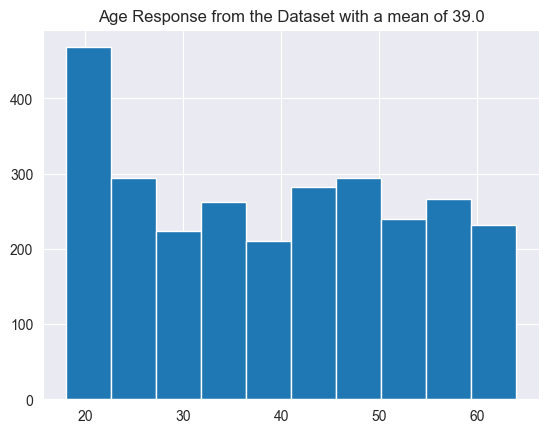

In [4]:
plt.hist(df['age'])
plt.title('Age Response from the Dataset with a mean of ' + str(df['age'].mean().round()))

In [5]:
df['age'].median()

39.0

In [6]:
df['bmi'].median()

30.447499999999998

Text(0.5, 1.0, 'BMI Response from the Dataset with a mean of 31.0')

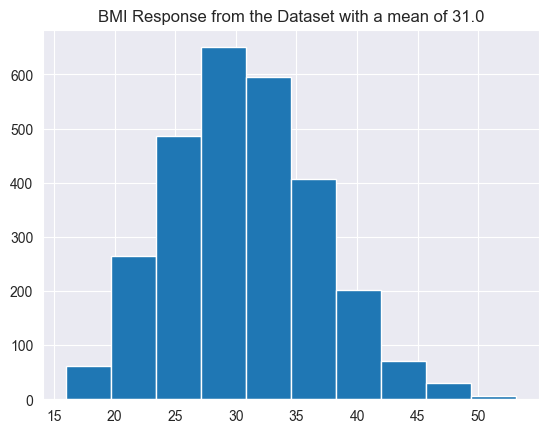

In [7]:
plt.hist(df['bmi'])
plt.title('BMI Response from the Dataset with a mean of ' + str(df['bmi'].mean().round()))

Text(0.5, 1.0, 'Children Response from the Dataset with a mean of 1.0')

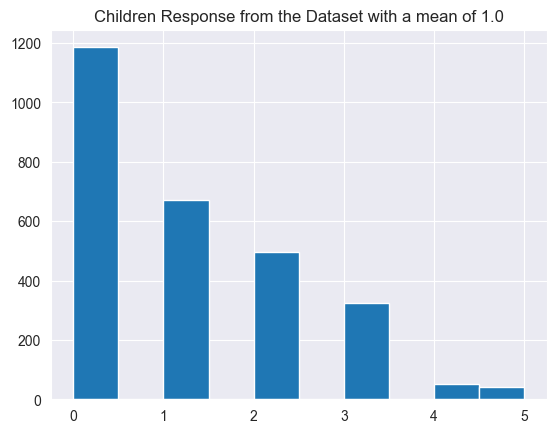

In [8]:
plt.hist(df['children'])
plt.title('Children Response from the Dataset with a mean of ' + str(df['children'].mean().round()))

Text(0.5, 1.0, 'BMI Response from the Dataset with a mean of 13261.0')

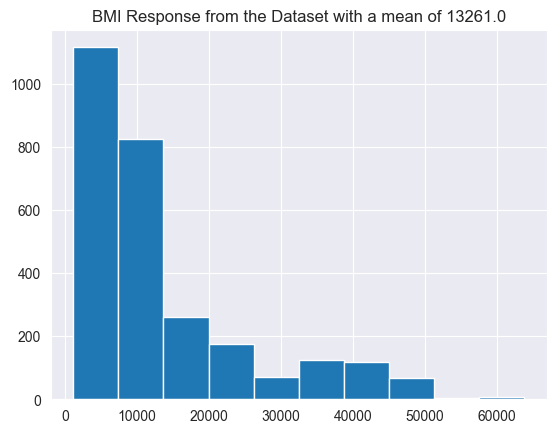

In [9]:
plt.hist(df['charges'])
plt.title('BMI Response from the Dataset with a mean of ' + str(df['charges'].mean().round()))

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Pearsons Correlation of Columns')

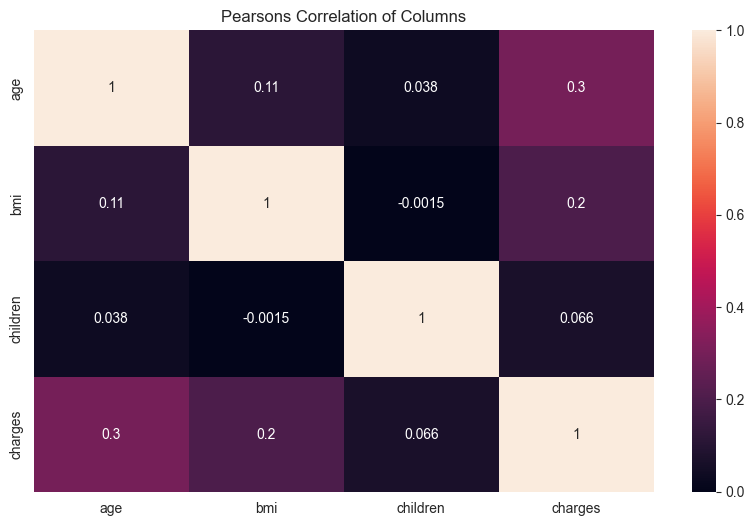

In [12]:

def get_numerical_cols(df):
    cols = []
    for i in df.columns:
        if df[i].dtype in ['int64', 'float64']:
            cols.append(i)
    return cols

nums = get_numerical_cols(df)

corr_matrix = df[nums].corr()

plt.figure(figsize = (10, 6))
sb.heatmap(corr_matrix, annot = True)
plt.title('Pearsons Correlation of Columns')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### Predictive Modeling:

- Predict insurance charges based on other variables using regression techniques such as linear regression, decision trees, random forests, or gradient boosting.
- Predict whether an individual is a smoker or not based on other factors using classification algorithms.
- Predict BMI category (e.g., underweight, normal, overweight, obese) based on other variables using classification algorithms.

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


In [15]:
df2 = df.copy()
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


In [16]:

def get_obj(df):
    le = LabelEncoder()
    for i in df.columns:
        if df[i].dtype in ['object']:
            df[i] = le.fit_transform(df[i])
    return df

In [17]:
get_obj(df2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,28,0,1,3,16885
1,18,1,34,1,0,2,1726
2,28,1,33,3,0,2,4449
3,33,1,23,0,0,1,21984
4,32,1,29,0,0,1,3867
...,...,...,...,...,...,...,...
2767,47,0,45,1,0,2,8570
2768,21,0,35,0,0,3,2020
2769,19,1,26,1,1,1,16451
2770,23,1,19,0,0,1,21595


In [18]:
x = df2.drop(columns = ['charges'])
y = df2['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (2217, 6)
x test (555, 6)
y train (2217,)
y test (555,)


In [19]:
lr = LinearRegression()

lr.fit(x_train, y_train) # pass the features and target parameters respectively

pred = lr.predict(x_test)
pred

array([ 4.32890639e+03,  1.18842271e+04,  3.07143776e+03,  2.01971302e+03,
        9.05385716e+03,  1.16615394e+04,  4.74964113e+03,  3.65710872e+04,
        8.18537761e+03,  2.64077937e+04,  1.10120704e+04,  1.47056538e+04,
        7.88869691e+03,  1.17051108e+04,  2.82831302e+03,  3.09055483e+04,
        3.53123806e+04,  2.86917646e+04,  6.89946835e+03,  4.06841386e+03,
        4.90374122e+03,  1.19111109e+04, -1.13831673e+03,  1.27608238e+04,
        1.23818962e+04,  1.03006443e+04,  5.46062917e+03,  2.64623442e+03,
        7.09600011e+03,  1.07744568e+04,  4.10526694e+04,  6.00219362e+03,
        6.56265432e+03,  1.15259274e+04,  3.05199890e+04,  2.55825106e+04,
        7.62940574e+03, -1.13831673e+03,  1.33918934e+04,  1.23336607e+04,
        3.32709932e+03,  1.17691388e+04,  3.23845634e+04,  1.05688191e+04,
        3.76540044e+04,  2.65406671e+03,  3.13142849e+04,  6.04266845e+03,
        1.07367535e+04,  1.49431518e+04,  7.19423340e+02,  2.96364603e+04,
        5.97286765e+03,  

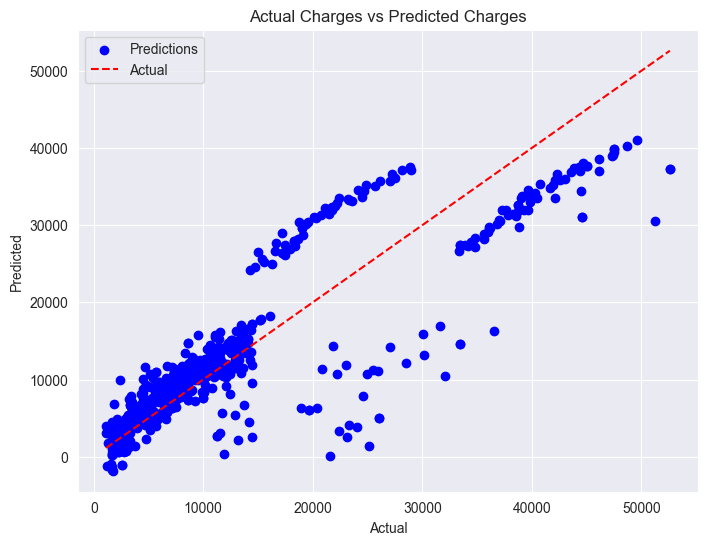

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.title('Actual Charges vs Predicted Charges')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [21]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,28,0,1,3,16885
1,18,1,34,1,0,2,1726
2,28,1,33,3,0,2,4449
3,33,1,23,0,0,1,21984
4,32,1,29,0,0,1,3867


In [22]:
x = df2.drop(columns=['smoker'])
y = df2['smoker']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (2217, 6)
x test (555, 6)
y train (2217,)
y test (555,)


In [23]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

smoker_predictions = dtc.predict(x_test)
smoker_predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

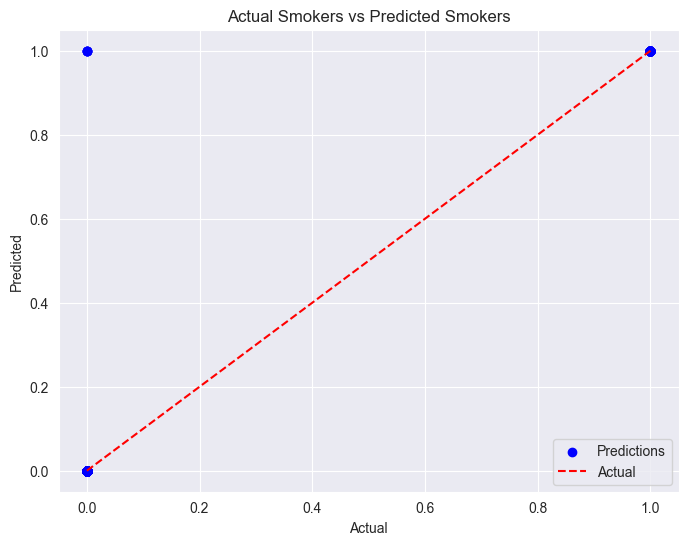

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, smoker_predictions, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.title('Actual Smokers vs Predicted Smokers')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


BMI	Weight Status
- Below 18.5	Underweight
- 18.5 – 24.9	Healthy Weight
- 25.0 – 29.9	Overweight
- 30.0 and Above	Obesity

In [26]:
def get_bmi_status(df):
    df['bmi status'] = ''
    for index, bmi in enumerate(df['bmi']):
        if bmi <= 18.5:
            df.loc[index, 'bmi status'] = 'underweight'
        elif bmi <= 24.9:
            df.loc[index, 'bmi status'] = 'healthy weight'
        elif bmi <= 29.9:
            df.loc[index, 'bmi status'] = 'overweight'
        else:
            df.loc[index, 'bmi status'] = 'obesity'
    return df

In [27]:
get_bmi_status(df2)

,age,sex,bmi,children,smoker,region,charges,bmi status
0,19,0,28,0,1,3,16885,overweight
1,18,1,34,1,0,2,1726,obesity
2,28,1,33,3,0,2,4449,obesity
3,33,1,23,0,0,1,21984,healthy weight
4,32,1,29,0,0,1,3867,overweight
...,...,...,...,...,...,...,...,...
2767,47,0,45,1,0,2,8570,obesity
2768,21,0,35,0,0,3,2020,obesity
2769,19,1,26,1,1,1,16451,overweight
2770,23,1,19,0,0,1,21595,healthy weight


In [28]:
x = df2.drop(columns = ['bmi status'])
y = df2['bmi status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (2217, 7)
x test (555, 7)
y train (2217,)
y test (555,)


In [29]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

predictions = rfc.predict(x_train)

In [30]:
for pred in predictions:
    print(pred)
    break

overweight


In [31]:
pred_proba = rfc.predict_proba(x_train)
pred_proba

array([[0.01, 0.  , 0.99, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.02, 0.  , 0.98, 0.  ],
       ...,
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.99, 0.  ],
       [0.01, 0.  , 0.99, 0.  ]])

In [32]:
rfc.score(x_train, predictions)

1.0

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


### Feature Engineering:

- Create new features such as age groups, BMI categories, or whether an individual has children or not.
- Encode categorical variables like sex and region into numerical format.

In [34]:
age_groups = df.groupby(df['age'])
age_groups['children'].value_counts().to_frame()

count
age children       
18  0           108
    1            20
    2            14
    3             4
    4             2
...             ...
63  2             2
64  0            26
    2            10
    1             6
    3             4

[219 rows x 1 columns]

In [35]:
df3 = df.copy()
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867


In [36]:
def get_children_status(df):
    df['children status'] = ''
    for index, child in enumerate(df['children']):
        if child == 0:
            df.loc[index, 'children status'] = 'no'
        elif child >=1:
            df.loc[index, 'children status'] = 'yes'
    return df

In [37]:
get_children_status(df3)

,age,sex,bmi,children,smoker,region,charges,children status
0,19,female,28,0,yes,southwest,16885,no
1,18,male,34,1,no,southeast,1726,yes
2,28,male,33,3,no,southeast,4449,yes
3,33,male,23,0,no,northwest,21984,no
4,32,male,29,0,no,northwest,3867,no
...,...,...,...,...,...,...,...,...
2767,47,female,45,1,no,southeast,8570,yes
2768,21,female,35,0,no,southwest,2020,no
2769,19,male,26,1,yes,northwest,16451,yes
2770,23,male,19,0,no,northwest,21595,no


Text(0, 0.5, '')

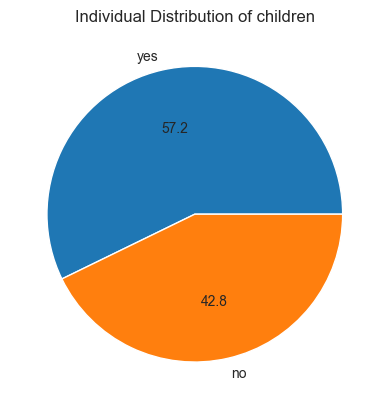

In [38]:
df3['children status'].value_counts().plot(kind='pie', autopct='%1.1f')
plt.title('Individual Distribution of children')
plt.xlabel(None)
plt.ylabel(None)

In [39]:
children = df3.groupby(df3['children status'])
yes_st = children.get_group('yes')
no_st = children.get_group('no')
# yes_st['charges']
yes_st
# children['charges'].sum()

,age,sex,bmi,children,smoker,region,charges,children status
1,18,male,34,1,no,southeast,1726,yes
2,28,male,33,3,no,southeast,4449,yes
6,46,female,33,1,no,southeast,8241,yes
7,37,female,28,3,no,northwest,7282,yes
8,37,male,30,2,no,northeast,6406,yes
...,...,...,...,...,...,...,...,...
2764,22,female,31,3,yes,southeast,35596,yes
2765,47,male,36,1,yes,southeast,42211,yes
2766,18,male,23,1,no,southeast,1711,yes
2767,47,female,45,1,no,southeast,8570,yes


In [40]:
no_st

,age,sex,bmi,children,smoker,region,charges,children status
0,19,female,28,0,yes,southwest,16885,no
3,33,male,23,0,no,northwest,21984,no
4,32,male,29,0,no,northwest,3867,no
5,31,female,26,0,no,southeast,3757,no
9,60,female,26,0,no,northwest,28923,no
...,...,...,...,...,...,...,...,...
2759,18,male,23,0,no,southeast,1122,no
2763,51,male,37,0,no,southwest,8799,no
2768,21,female,35,0,no,southwest,2020,no
2770,23,male,19,0,no,northwest,21595,no


In [41]:
total_bmi_charges = df2.groupby(df2['bmi status'])
total_bmi_charges['charges'].sum().to_frame().sort_values(by='charges', ascending=False).rename(columns={'charges':'total charges'})

,total charges
bmi status,
obesity,23073682
overweight,8585310
healthy weight,4737905
underweight,363620


In [42]:
df2['bmi status'].value_counts()

bmi status
obesity           1488
overweight         778
healthy weight     464
underweight         42
Name: count, dtype: int64

### Clustering:

Group individuals into clusters based on similarities in their characteristics (e.g., age, BMI, number of children) using clustering algorithms like K-means or hierarchical clustering.